/var/folders/7d/w70115797_77fxk7ry8vs1rm0000gn/T/ipykernel_38383/3104329013.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_t = torch.tensor(x, dtype=torch.int)


tensor([-2.0133e-03,  1.0000e+00, -1.0194e-22])
Parameter containing:
tensor([[ 9.9999e-01, -4.1896e-16,  4.9565e-11],
        [-2.0133e-03,  1.0000e+00, -1.0194e-22],
        [-3.7748e-03, -9.3241e-22,  9.8960e-01]], requires_grad=True)


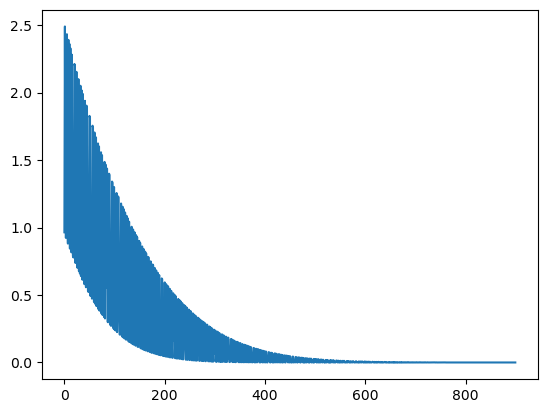

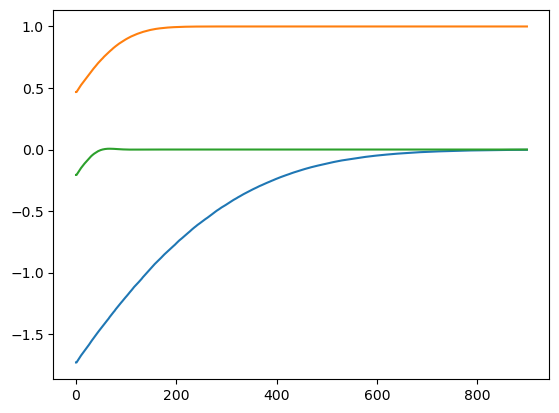

In [114]:
import torch
import torch.utils.data
import matplotlib.pyplot as plt

class Emb(torch.nn.Module):
    def __init__(self, dims: int):
        super().__init__()
        self.emb = torch.nn.Embedding(num_embeddings=dims, embedding_dim=dims)
    
    def forward(self, x):
        e = self.emb(x)
        return e
    
dims = 3

class Dataset(torch.utils.data.Dataset):
    def __init__(self, dims: int):
        # xs = torch.range(0, num_embeddings-1, dtype=torch.int)
        xs = range(0, dims)
        ys = torch.eye(dims)
        self.data = dict(zip(xs, ys))
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = idx
        y = self.data[x]
        return {'x': x, 'y': y}

model = Emb(dims=dims)
dataset = Dataset(dims=dims)
dataloader = torch.utils.data.DataLoader(dataset=dataset, batch_size=1, shuffle=True)
opt = torch.optim.Adam(params=model.parameters(), lr=0.01)
epochs = 300


vecs = []
losses = []
model.train()
for epoch in range(epochs):
    for batch in dataloader:
        x = batch['x']
        y_gt = batch['y']
        x_t = torch.tensor(x, dtype=torch.int)
        
        opt.zero_grad()
        y_pred = model(x_t)
        # print(y_pred)
        loss = torch.nn.functional.mse_loss(y_pred, y_gt)
        # print(loss)
        losses.append(loss.item())
        loss.backward()
        opt.step()
        
        with torch.no_grad():
            model.eval()
            y_pred_eval = model(torch.tensor(1, dtype=torch.int))
            vecs.append(y_pred_eval)

vecs_t = torch.stack(vecs, dim=0)
plt.plot(losses)
plt.figure()
plt.plot(vecs_t.detach().numpy())
print(vecs_t[-1,:])
print(model.emb.weight)